### Data Preparation and preprocessing
features will be the last 9 integers in each row, and the labels will be the first integer in each row

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Load your data
df = pd.read_excel('C:/Users/ailaty/Desktop/Python Scripts/CO2emission prediction/serial_data.xlsx')


# Assuming your data is in a column named 'Values'
# Splitting the 'Values' column by comma, accounting for the initial 'CO2 (ppm): ' string
data = df['Values'].str.split(',', expand=True)

# Handling the 'CO2 (ppm): ' prefix and considering the first value after the prefix as the label
labels = data.iloc[:, 1]  # Second column (label)
features = data.iloc[:, 2:]  # Remaining columns (features)

# Rename columns for clarity (optional step)
features.columns = [f'Feature_{i}' for i in range(1, 10)]
labels.name = 'Label'

# Concatenate features and labels into a new DataFrame
processed_data = pd.concat([features, labels], axis=1)

# Save the processed data to a new CSV file
processed_data.to_csv('processed_data.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ailaty/Desktop/Python Scripts/CO2emmision prediction/serial_data.xlsx'

In [49]:
processed_data = pd.read_csv('C:/Users/ailaty/Desktop/Python Scripts/CO2emission prediction/processed_data.csv')


In [50]:
processed_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
0,597,676,409,410,407,544,410,407,467,530
1,567,671,408,409,407,541,410,407,464,518
2,558,670,408,409,406,541,409,407,463,517
3,548,668,408,409,406,537,409,407,460,511
4,543,666,408,409,403,534,408,407,459,508


In [51]:
processed_data.shape

(49, 10)

In [52]:
processed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature_1,49.0,479.020408,39.850497,436.0,450.0,461.0,502.0,597.0
Feature_2,49.0,634.714286,19.407902,611.0,617.0,629.0,650.0,676.0
Feature_3,49.0,407.204082,0.455503,407.0,407.0,407.0,407.0,409.0
Feature_4,49.0,407.877551,0.780829,407.0,407.0,408.0,408.0,410.0
Feature_5,49.0,402.387755,1.255261,402.0,402.0,402.0,402.0,407.0
Feature_6,49.0,510.000000,17.541617,486.0,493.0,513.0,524.0,544.0
Feature_7,49.0,404.673469,3.411914,401.0,401.0,405.0,408.0,410.0
Feature_8,49.0,405.346939,0.804959,404.0,405.0,405.0,406.0,407.0
Feature_9,49.0,441.367347,11.898344,425.0,429.0,441.0,450.0,467.0
Label,49.0,448.612245,38.632249,409.0,410.0,437.0,484.0,530.0


In [53]:
processed_data.dtypes

Feature_1    int64
Feature_2    int64
Feature_3    int64
Feature_4    int64
Feature_5    int64
Feature_6    int64
Feature_7    int64
Feature_8    int64
Feature_9    int64
Label        int64
dtype: object

In [54]:
print('The missing values in the original dataset per column:')
processed_data.isna().sum()

The missing values in the original dataset per column:


Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Feature_9    0
Label        0
dtype: int64

# Feature check

<Axes: >

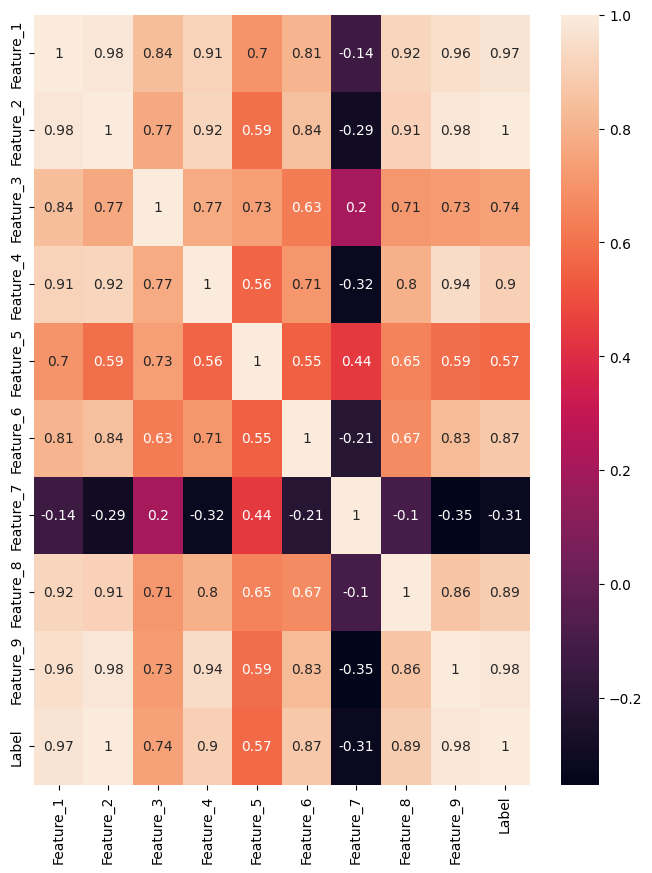

In [56]:
import seaborn as sns
plt.figure(figsize = (8,10))
sns.heatmap(processed_data.corr(), annot=True)

### To test for multicolinearity in the features selected, Using the Variance Inflator Factor (VIF)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from matplotlib.legend import _get_legend_handles_labels

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = processed_data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(processed_data.values, i) for i in range(len(processed_data.columns))]
  
print(vif_data)


# remove feature with high VIF value

     feature           VIF
0  Feature_1  2.195254e+04
1  Feature_2  3.338403e+05
2  Feature_3  4.177655e+06
3  Feature_4  4.802985e+06
4  Feature_5  9.830474e+05
5  Feature_6  2.065058e+04
6  Feature_7  1.490509e+05
7  Feature_8  2.091234e+06
8  Feature_9  1.187826e+05
9      Label  9.401642e+04


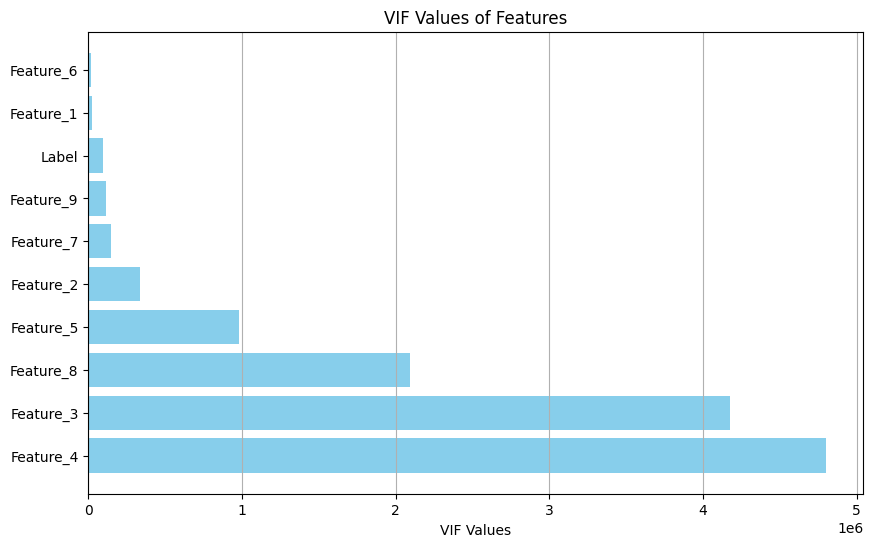

In [59]:
# Sort the VIF data by VIF values in descending order for better visualization
sorted_vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Plotting VIF values
plt.figure(figsize=(10, 6))
plt.barh(sorted_vif_data['feature'], sorted_vif_data['VIF'], color='skyblue')
plt.xlabel('VIF Values')
plt.title('VIF Values of Features')
plt.grid(axis='x')
plt.show()


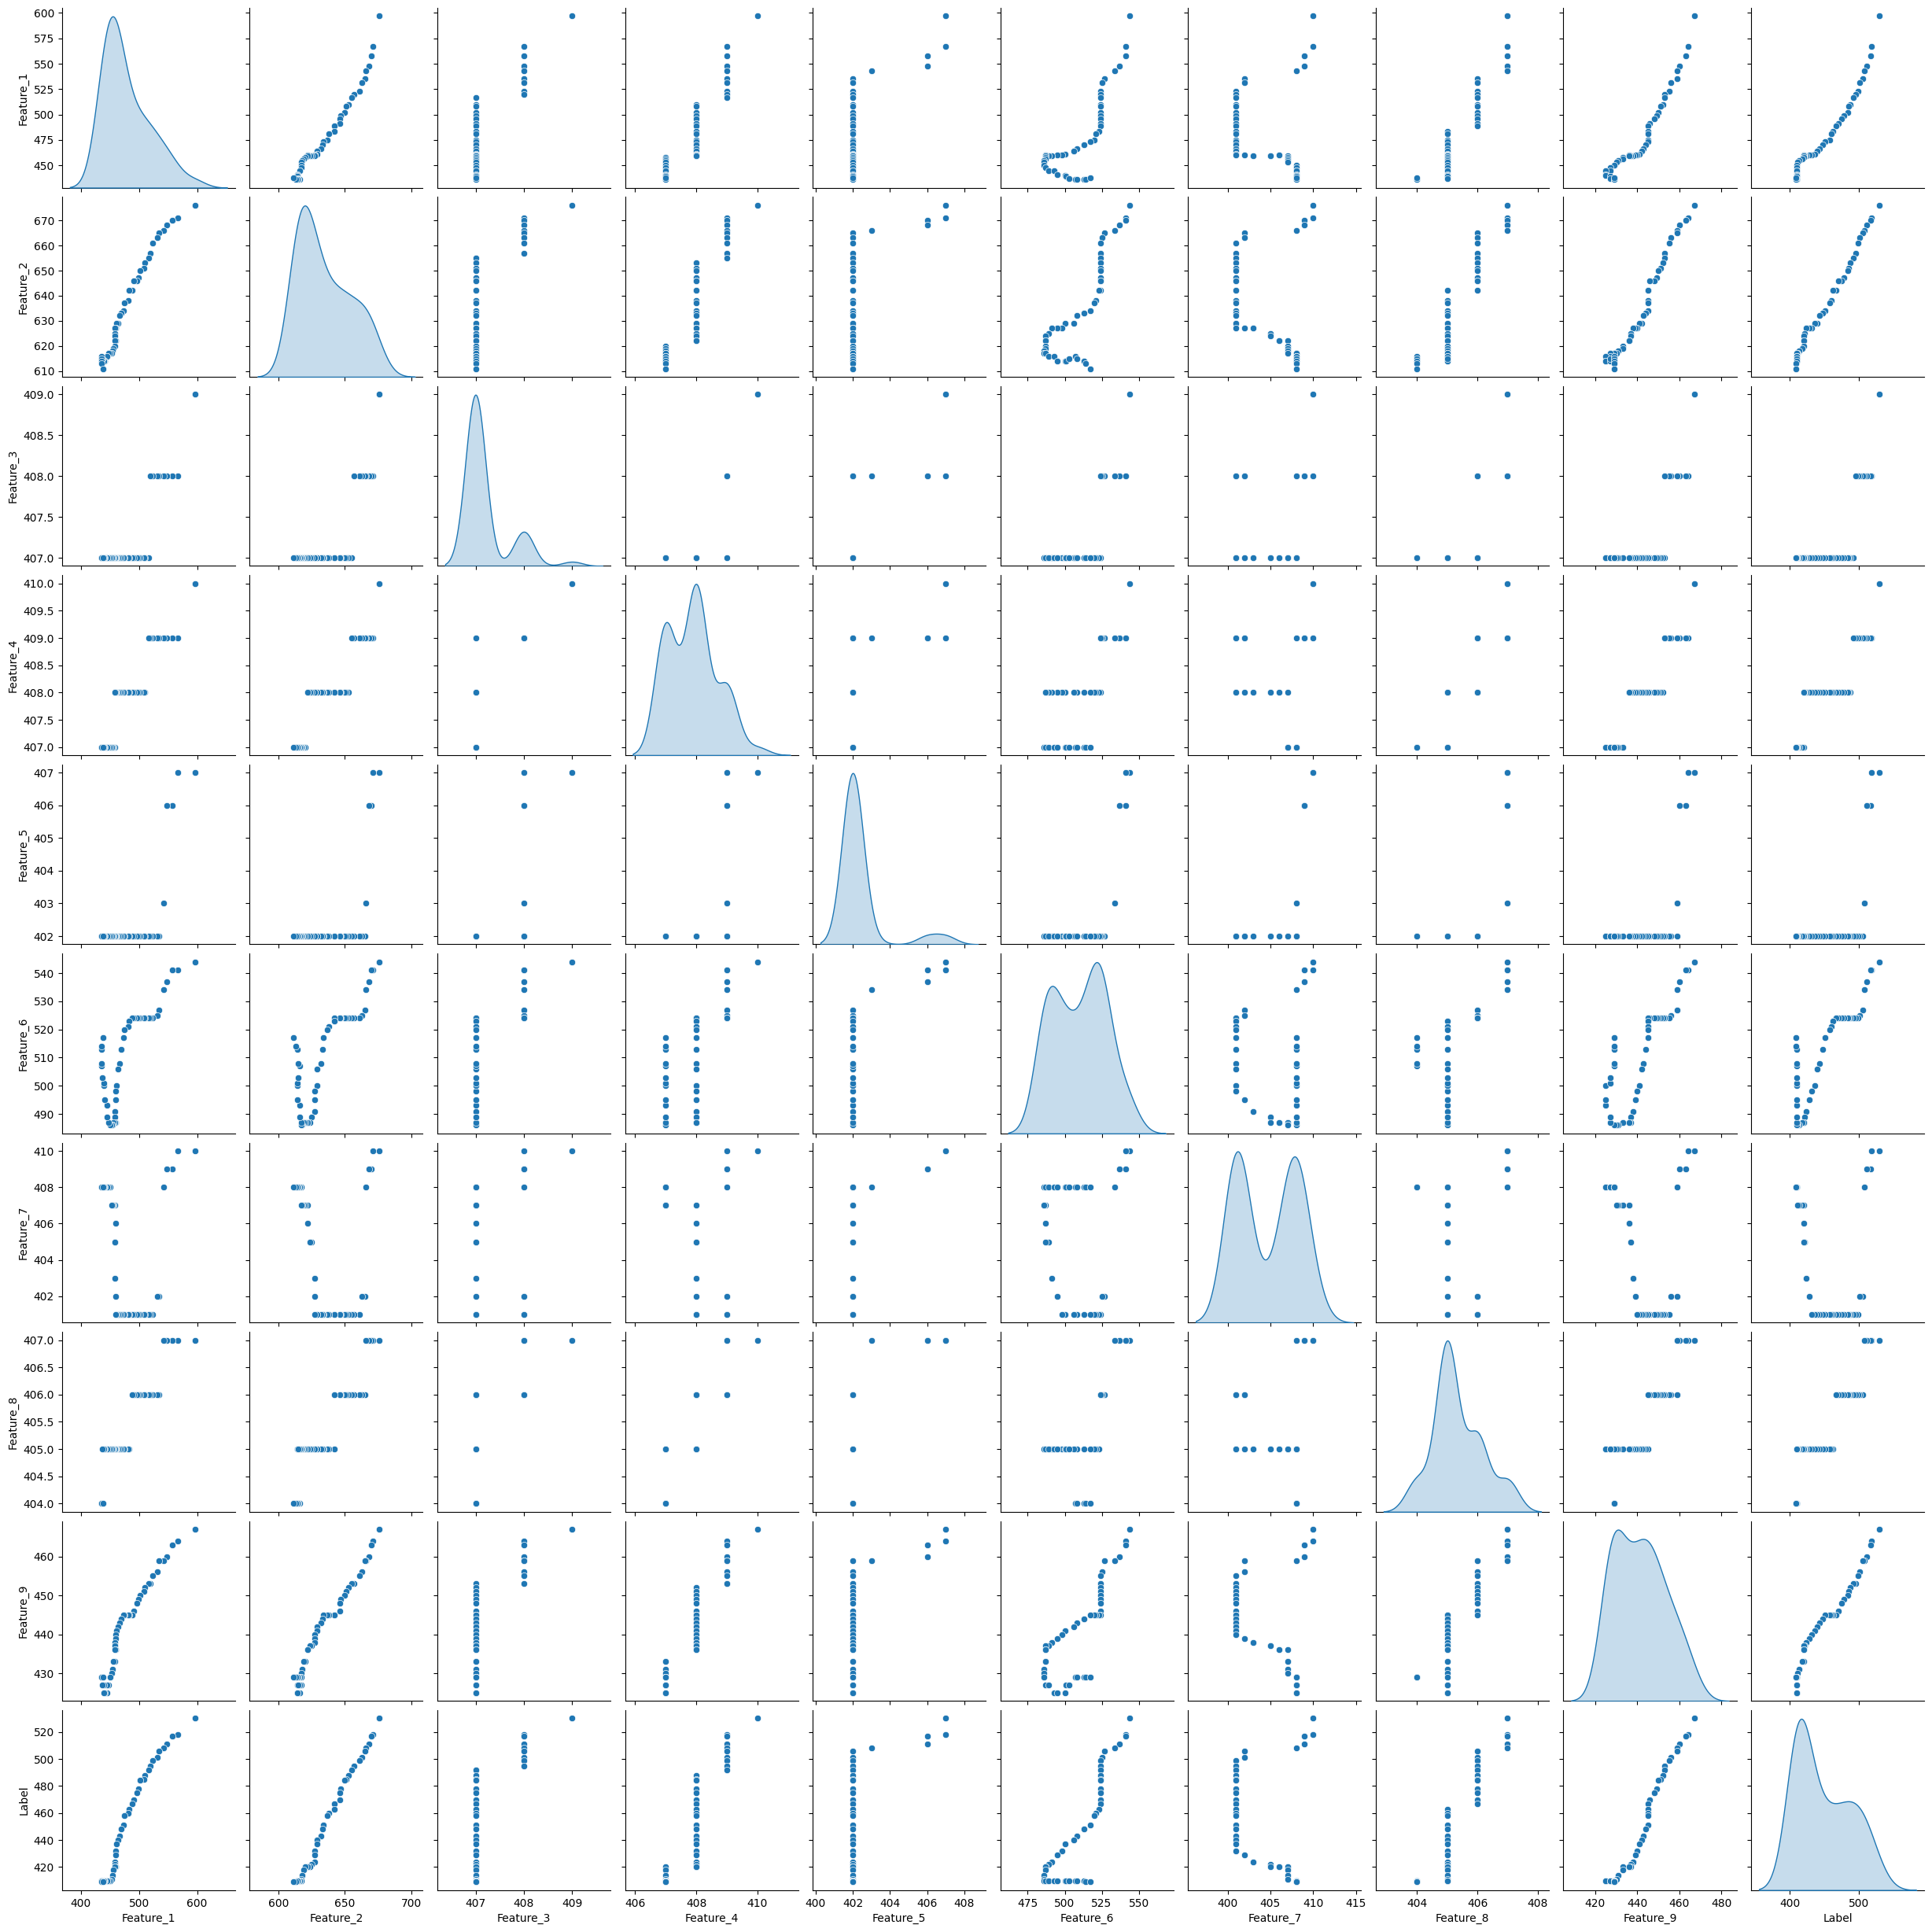

In [60]:
sns.pairplot(processed_data[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Label']],
             diag_kind="kde")

### Model Selection
* Linear Regression: A simple and interpretable model that assumes a linear relationship between features and the target variable.
* Decision Trees or Random Forests: These models can capture nonlinear relationships and handle interactions between features well.
* Support Vector Machines (SVM): Good for small datasets and can capture complex relationships.
* KNN
* Multi-Layer Perceptrons (MLP)
* LSTM
* ARIMA

### Model Training
Split the dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load your processed data
processed_data = pd.read_csv('processed_data.csv')

# Assuming 'Label' column is your target variable and the rest are features
X = processed_data.drop('Label', axis=1)  # Features
y = processed_data['Label']  # Target variable

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train (features for training), X_test (features for testing),
# y_train (target variable for training), y_test (target variable for testing)
# You can use these sets to train your model and evaluate its performance

In [18]:
# Initializing Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test) 

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.9832708120765146
R^2 Score: 0.9926913803194868


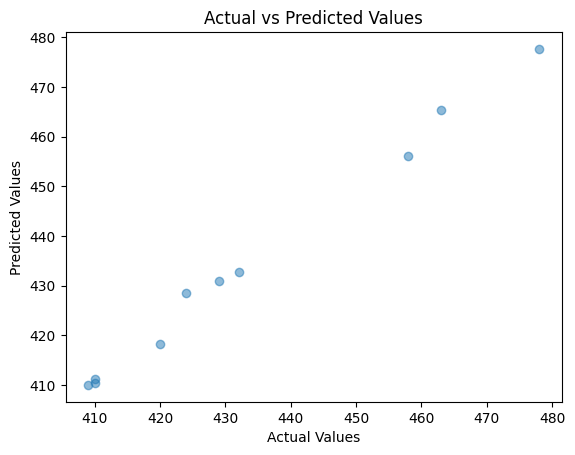

In [19]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

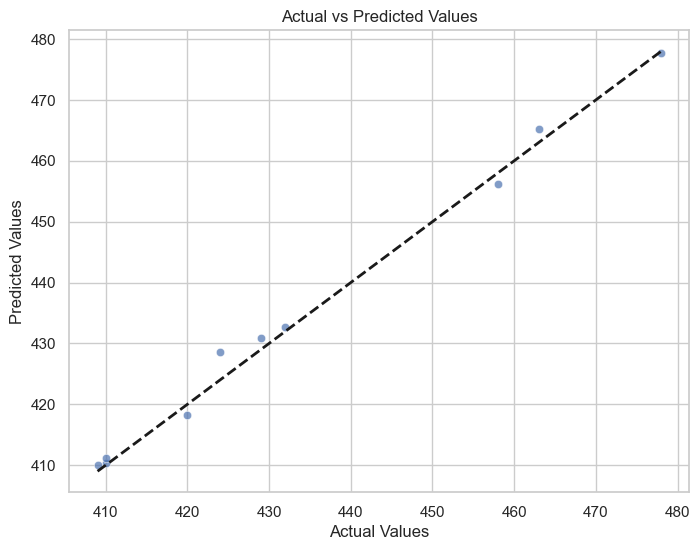

In [21]:
import seaborn as sns
# Set style for the plot
sns.set(style="whitegrid")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined from previous steps

# Initializing Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Training the model
tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluating the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Model:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R^2 Score: {r2_tree}")

Decision Tree Model:
Mean Squared Error: 17.6
R^2 Score: 0.9677070145501917


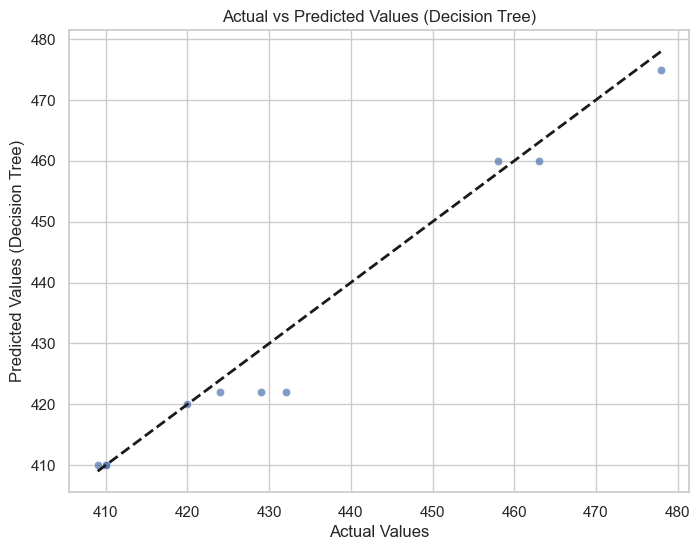

In [24]:
# Set style for the plot
sns.set(style="whitegrid")

# Scatter plot of actual vs predicted values for Decision Tree model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.show()

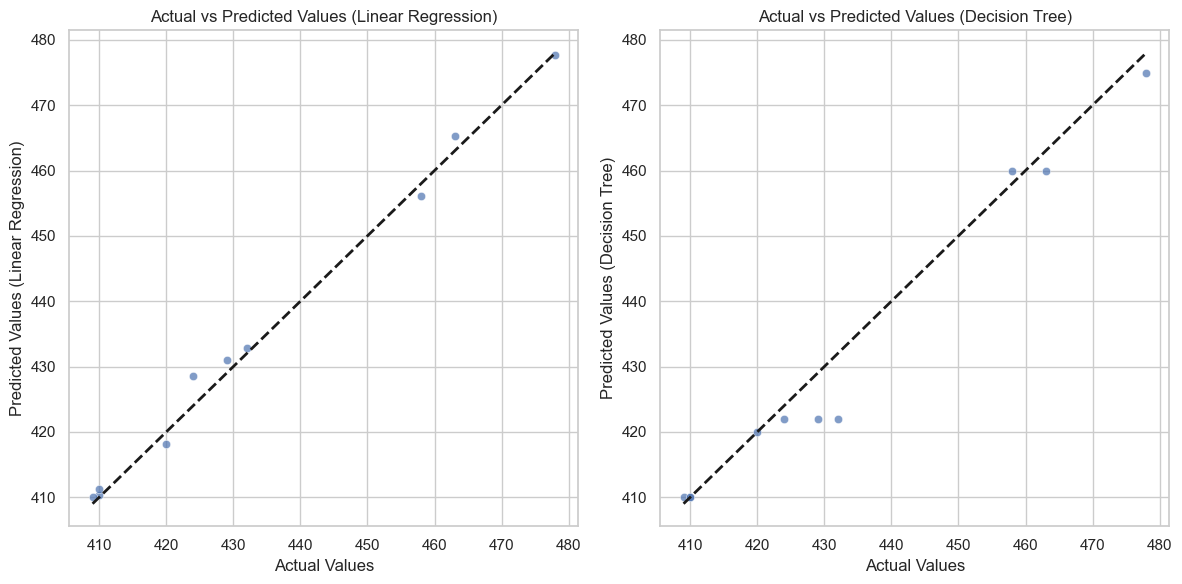

In [26]:
# Scatter plot comparing the two models
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Linear Regression Model plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Actual vs Predicted Values (Linear Regression)')

# Decision Tree Model plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted Values (Decision Tree)')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.svm import SVR
# Initialize and train an SVM regressor
svm_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM Model:")
print(f"Mean Squared Error: {mse_svm}")
print(f"R^2 Score: {r2_svm}")

SVM Model:
Mean Squared Error: 6.127863133772233
R^2 Score: 0.9887564207376521


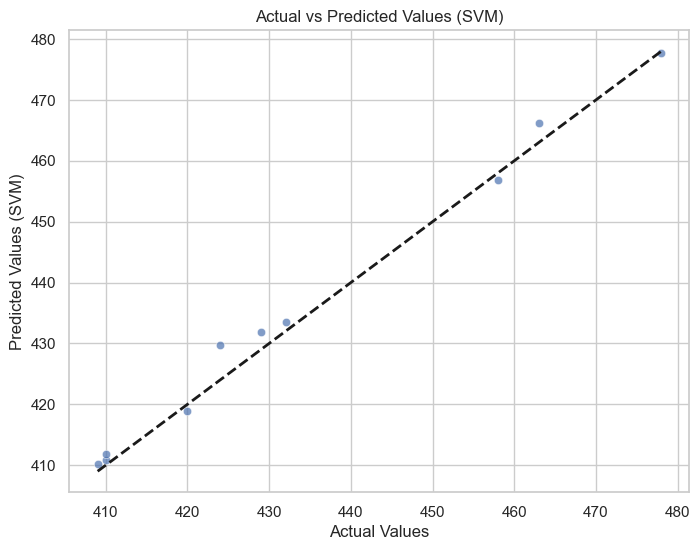

In [28]:
# Scatter plot comparing actual vs predicted values for SVM model
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.scatterplot(x=y_test, y=y_pred_svm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (SVM)')
plt.title('Actual vs Predicted Values (SVM)')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sympy import nroots
from sklearn import model_selection as ms
from sklearn import feature_selection as fs
from sklearn import metrics

# Set 8 folds for cross validation for the feature selection
nr.seed(5)
folds = ms.KFold(n_splits=8, shuffle = True, random_state=random_state)

# Define the model
RFR_selector = RandomForestRegressor(random_state=random_state) 

# Define an objects for a model for RFECV (recursive feature elimination with CV)
nr.seed(5)
selector = fs.RFECV(estimator = RFR_selector, cv = folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(ft_train, np.ravel(lb_train))

# print the important features and thier rank
ranks = list(np.transpose(selector.ranking_))
selected_features = [i for i,j in zip(ft_cols,ranks) if j==1]

print("Feature ranking after RFECV:")
print(selector.ranking_)

print("Selected features:")
print(selected_features)

print('This denotes that all features are important')

# KNN

In [ ]:
nroots.seed(5)

KNR = KNeighborsRegressor()

k_parameters = {'n_neighbors': np.arange(1,40,1)}
KNR_cv_model = ms.GridSearchCV(KNR, k_parameters, cv = 5)

#Fitting the KNR model to the dataset
KNR_cv_model.fit(ft_train_s, lb_train)

#Best parameters
KNR_cv_model.best_params_

In [ ]:
# Tuned model
KNR_tuned = KNR_cv_model.best_estimator_
# plot predicted vs actual values
predictions = KNR_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [Mt] - predicted")
plt.ylabel("CO2 emissions [Mt] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions = KNR_tuned.predict(ft_test_s)
print('Tuned KNeighborsRegressor')

KNN_MAE = mean_absolute_error(test, predictions)
print('MAE : {}'.format(KNN_MAE))
KNN_MSE = mean_squared_error(test, predictions)
print('MSE : {}'.format(KNN_MSE))
KNN_RMSE = sqrt(KNN_MSE)
print('RMSE : %f' % KNN_RMSE)
KNN_R2_score = r2_score(test, predictions)
print('R2_score : {}'.format(KNN_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions

# Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor


MLP = MLPRegressor(max_iter=500)
param_list = {"hidden_layer_sizes": [1,2,3,5,8], 
              "solver": ["lbfgs", "sgd", "adam"],
              }
MLP_CV = ms.GridSearchCV(estimator=MLP,cv=5, param_grid=param_list)

MLP_CV.fit(ft_train_s, lb_train)

#code to check for the best parameter
MLP_CV.best_params_

In [ ]:
MLP_tuned = MLP_CV.best_estimator_
# plot predicted vs actual values
predictions3 = MLP_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions3, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions3,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:

# Model Evaluation
test = lb_test
predictions3 = MLP_tuned.predict(ft_test_s)
print('Tuned MLP')

MLP_MAE = mean_absolute_error(test, predictions3)
print('MAE : {}'.format(MLP_MAE))
MLP_MSE = mean_squared_error(test, predictions3)
print('MSE : {}'.format(MLP_MSE))
MLP_RMSE = sqrt(MLP_MSE)
print('RMSE : %f' % MLP_RMSE)
MLP_R2_score = r2_score(test, predictions3)
print('R2_score : {}'.format(MLP_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions3

# LSTM

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import time
import math


In [31]:
# Load your processed data
df = pd.read_csv('processed_data.csv')

# Create numpy arrays for features and labels
features = df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9']].values
labels = df['Label'].values

# Normalize features
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Define sequence length
sequence_length = 10  # You can adjust this based on the sequence length you want to consider

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Create sequences
sequences = create_sequences(features, sequence_length)

# Split the data into training and testing sets
X, y = sequences[:, :-1], sequences[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Build LSTM model
model = Sequential()
# Add a LSTM with output_dim (number of hidden neurons) = 50 and input_dim (number of features) = 9 or 1!
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
# As we will have x outputs from LSTM at each time step, we will use a linear layer to map them to a single "prediction" output
model.add(Dense(9))

# Compile the model
start = time.time()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
print("Compilation Time : ", time.time() - start)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict using the model
predicted_values = model.predict(X_test)

Compilation Time :  0.010943174362182617
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.0918 - accuracy: 0.0323 - val_loss: 0.0837 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0794 - accuracy: 0.0323 - val_loss: 0.0740 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0684 - accuracy: 0.0323 - val_loss: 0.0652 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0585 - accuracy: 0.0645 - val_loss: 0.0572 - val_accuracy: 0.1250
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0498 - accuracy: 0.0645 - val_loss: 0.0500 - val_accuracy: 0.1250
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0422 - accuracy: 0.1613 - val_loss: 0.0437 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0359 - accuracy: 0.3226 - val_loss: 0.0383

In [33]:
trainPredict = model.predict(X_train)
# Flatten the arrays
y_test_flat = y_test.flatten()
predicted_values_flat = predicted_values.flatten()

# Rescaling back
trainPredict = scaler.inverse_transform(trainPredict)
Ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()  # Reshape y_train to match the shape of trainPredict and flatten it
predicted_values_flat = scaler.inverse_transform(predicted_values_flat)
Ytest = scaler.inverse_transform(y_test_flat.reshape(-1, 1)).flatten()  # Reshape y_test to match the shape of predicted_values and flatten it

# Reshape Ytrain and Ytest to match the shape of trainPredict and predicted_values_flat
Ytrain = Ytrain.reshape(-1)
Ytest = Ytest.reshape(-1)



1/1 [==============================] - 0s 18ms/step


ValueError: non-broadcastable output operand with shape (279,1) doesn't match the broadcast shape (279,9)

In [34]:
# Perform predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Rescaling back
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape to match trainPredict
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape to match testPredict

# Flatten the arrays
trainPredict_flat = trainPredict.flatten()
testPredict_flat = testPredict.flatten()
y_train_flat = y_train_inverse.flatten()  # Flatten y_train_inverse
y_test_flat = y_test_inverse.flatten()  # Flatten y_test_inverse

# Calculate residuals
train_residuals = y_train_flat - trainPredict_flat
test_residuals = y_test_flat - testPredict_flat

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(train_residuals)), train_residuals, color='blue', label='Train Residuals')
plt.scatter(range(len(test_residuals)), test_residuals, color='red', label='Test Residuals')
plt.title('Residual Plot')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.axhline(y=0, color='green', linestyle='--')
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


ValueError: non-broadcastable output operand with shape (279,1) doesn't match the broadcast shape (279,9)

In [ ]:
#plotting results
#shifting train predictions for plotting
trainPredictPlot = np.empty_like(co2_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seasonality:len(trainPredict)+seasonality, :] = trainPredict
#shifting test predictions for plotting
testPredictPlot = np.empty_like(co2_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seasonality*2)+1:len(co2_scaled)-1, :] = testPredict

#finding overall prediction
Xall = [] 
for i in range(len(co2_scaled) - seasonality):
    Xall.append(co2_scaled[i:(i+seasonality), 0])           # pick up the section in time_window size
Xall = np.array(Xall)                                       # Convert them from list to array   
Xall = np.reshape(Xall, (Xall.shape[0], seasonality, 1))    # hide this when using 2 layer NN
allPredict = model.predict(Xall) 
allPredict = scaler.inverse_transform(allPredict)
allPredictPlot = np.empty_like(co2_scaled)
allPredictPlot[:, :] = np.nan
allPredictPlot[seasonality:, :] = allPredict

#plotting predictions
plt.figure()
plt.title('Original yearly co2 emission')
plt.xlabel('Month')
plt.ylabel('co2 emission')
plt.plot(scaler.inverse_transform(co2_scaled), label='True Data')
plt.plot(allPredictPlot, label='One-Step Prediction')
plt.legend()
plt.show()

In [10]:
# Evaluate the model
mse_lstm = np.mean(np.square(predicted_values - y_test))
print(f"Mean Squared Error (LSTM): {mse_lstm}")

Mean Squared Error (LSTM): 0.05722162779316897


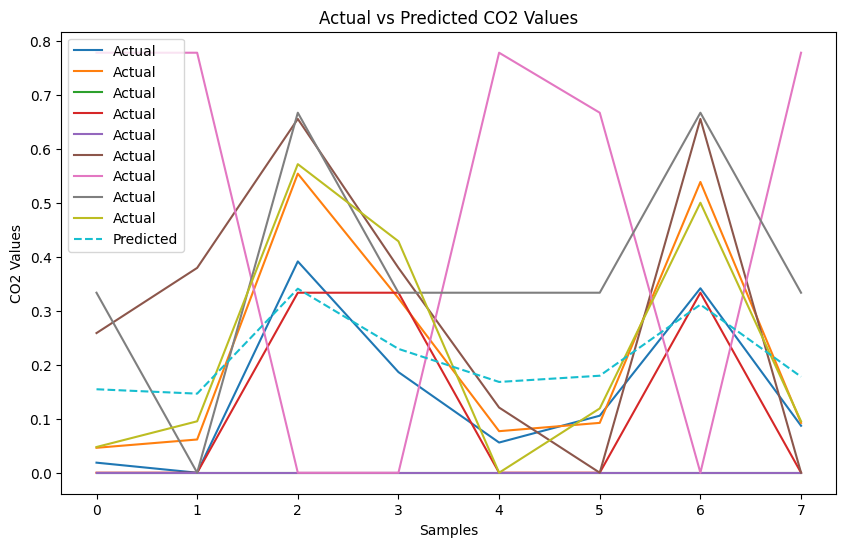

In [11]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted CO2 Values')
plt.xlabel('Samples')
plt.ylabel('CO2 Values')
plt.legend()
plt.show()

In [17]:
# Calculate residuals
residuals = y_test.flatten() - predicted_values.flatten()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='blue')
plt.title('Residual Plot')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

ValueError: operands could not be broadcast together with shapes (72,) (8,) 

In [14]:
residuals = y_test.flatten() - predicted_values.flatten()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

NameError: name 'residuals' is not defined

<Figure size 800x600 with 0 Axes>

ValueError: x and y must be the same size

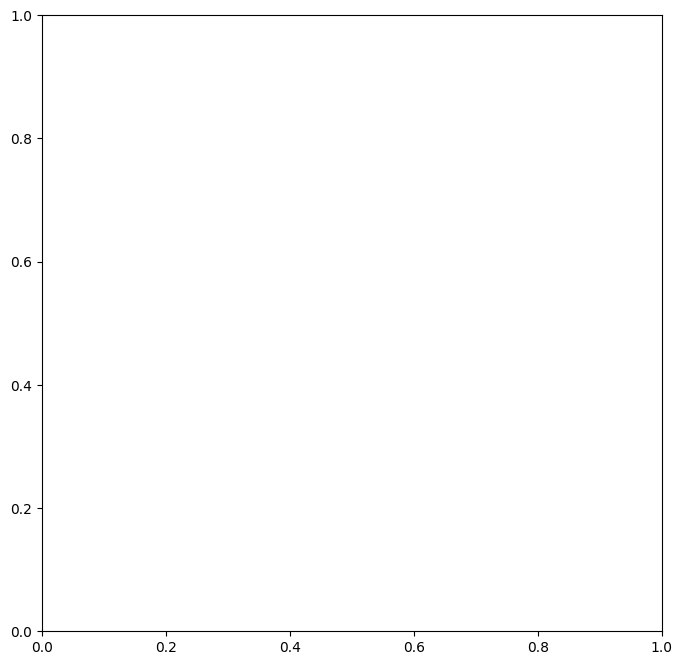

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predicted_values.flatten(), color='green')
plt.title('Actual vs Predicted CO2 Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


# ARIMA

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
print('Statsmodel Version: ', sm.__version__)

import warnings
warnings.filterwarnings("ignore")

Statsmodel Version:  0.14.0


In [38]:
df['loglabel'] = np.log(df['Label'])
df.tail()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label,loglabel
44,436,616,407,407,402,507,408,404,429,410,6.016157
45,436,615,407,407,402,508,408,404,429,410,6.016157
46,436,614,407,407,402,513,408,404,429,410,6.016157
47,436,613,407,407,402,514,408,404,429,409,6.013715
48,438,611,407,407,402,517,408,404,429,409,6.013715


In [39]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(endog = df['loglabel'], order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               loglabel   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 191.093
Date:                Mon, 11 Dec 2023   AIC                           -376.186
Time:                        13:09:42   BIC                           -370.573
Sample:                             0   HQIC                          -374.065
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9145      0.073     12.610      0.000       0.772       1.057
ma.L1         -0.6032      0.169     -3.567      0.000      -0.935      -0.272
sigma2      2.008e-05   3.39e-06      5.931      0.0

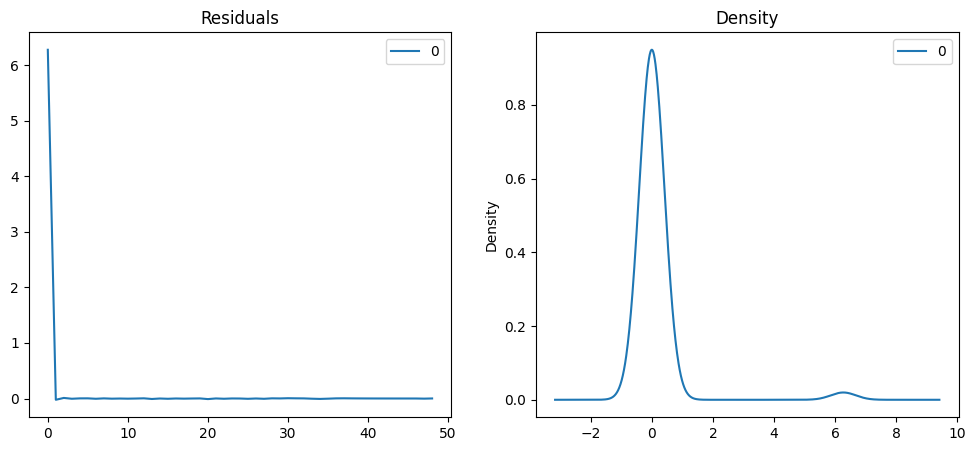

In [40]:
# Plot Residual Errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize = (12,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- The training process of an ARIMA Model is extremely fast. This in comparison with the training and tuning process of the LSTM Model.
- When the availability of data, computational resources and time is restricted, an ARIMA Model is a good way of providing good overall forecasting results.
- When the availability of data, computational resources and time is more relaxed, a LSTM Model can deliver more precise results when needed.

### Model Evaluation
Evaluate the model's performance using appropriate metrics such as Mean Squared Error (MSE), R-squared score, or Mean Absolute Error (MAE).

In [ ]:
#Summary of model scores from different metrics
KNN_model = KNN_MAE,KNN_MSE,KNN_RMSE,KNN_R2_score
RF_model = RF_MAE,RF_MSE,RF_RMSE,RF_R2_score
DT_model = DT_MAE,DT_MSE,DT_RMSE,DT_R2_score
MLP_model = MLP_MAE,MLP_MSE,MLP_RMSE,MLP_R2_score

summary = pd.DataFrame([KNN_model,RF_model,DT_model,MLP_model],
                       index = ['KNN','RF','DT','MLP'], 
                       columns = ['MAE','MSE','RMSE','R2_score'])
summary

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['MAE'], y = summary.index)
plt.xlabel("Mean Absolute Error [MT]")
plt.ylabel("Models")
plt.title("Mean absolute error of models [MT]")

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['MSE'], y = summary.index)
plt.xlabel("Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Mean Squared Error of models [MT]")

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['RMSE'], y = summary.index)
plt.xlabel("Root Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Root Mean Squared Error of models [MT]")
     

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['R2_score'], y = summary.index)
plt.xlabel("R2 Score of models")
plt.ylabel("Models")
plt.title("Accuracy of models")

Making forecast for the next

In [ ]:
#making forecast for next timeframe
year = ['2021','2022','2023']
MLP_fcast = model.predict(y_test)
MLP_fcast = pd.DataFrame(scaler.inverse_transform(MLP_fcast)).T
MLP_fcast['year'] = pd.to_datetime(year)
MLP_fcast = MLP_fcast.set_index('year')

CNN_fcast = model1.predict(y_test)
CNN_fcast = pd.DataFrame(scaler.inverse_transform(CNN_fcast)).T
CNN_fcast['year'] = pd.to_datetime(year)
CNN_fcast = CNN_fcast.set_index('year')

LSTM_fcast = model2.predict(y_test)
LSTM_fcast = LSTM_fcast.reshape(LSTM_fcast.shape[0], LSTM_fcast.shape[1])
LSTM_fcast = pd.DataFrame(scaler.inverse_transform(LSTM_fcast)).T
LSTM_fcast['year'] = pd.to_datetime(year)
LSTM_fcast = LSTM_fcast.set_index('year')

In [ ]:
plt.figure(figsize=(12,8))
#plt.plot(UK_data, marker="o", color="blue")
(line1,) = plt.plot(MLP_fcast, marker="o", color="blue")
(line2,) = plt.plot(CNN_fcast, marker="o", color="red")
(line3,) = plt.plot(LSTM_fcast, marker="o", color="green")
plt.legend([line1, line2, line3], ["MLP forecast", "CNN forecast", 'LSTM forcast'])
plt.title('Co2 forecast for next three years (Neural Network models)')
plt.show()